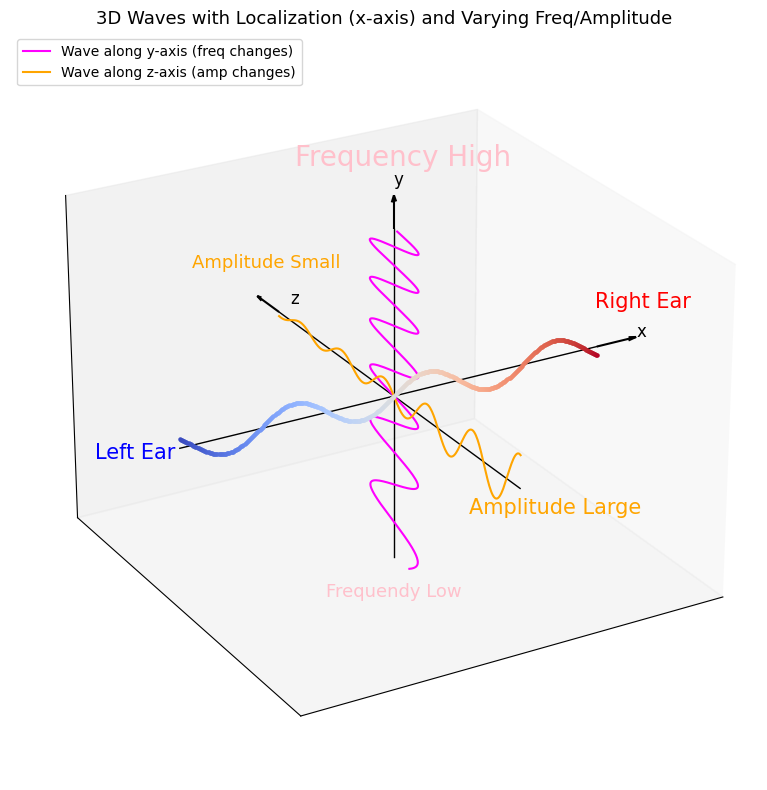

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# -----------------------------
# 1) 軸(アロー付き)を中心(原点)に描画
# -----------------------------
limit = 5
ax.plot([-limit, limit],[0,0],[0,0], color='black', linewidth=1)
ax.plot([0,0],[-limit, limit],[0,0], color='black', linewidth=1)
ax.plot([0,0],[0,0],[-limit, limit], color='black', linewidth=1)

arrow_size = 1
ax.quiver(limit, 0, 0, arrow_size, 0, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, limit, 0, 0, arrow_size, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, 0, limit, 0, 0, arrow_size, color='black', arrow_length_ratio=0.2)

# 軸ラベル
ax.text(limit+1, 0, 0, 'x', color='black', fontsize=12)
ax.text(0, limit -0.5  , 0.5  , 'z', color='black', fontsize=12)
ax.text(0, 0, limit+1.3, 'y', color='black', fontsize=12)

# 左右定位のイメージ
ax.text(-limit-1, 0, 0, 'Left Ear', color='blue', fontsize=15, ha='center')
ax.text(limit+1.5, 0.5, 0.5, 'Right Ear', color='red', fontsize=15, ha='center')

ax.text(0, -limit-1.3, 0, 'Amplitude Large', color='orange', fontsize=15, ha='center')
ax.text(0.5, limit+1.5, 0.5, 'Amplitude Small', color='orange', fontsize=13, ha='center')
ax.text(0, 0, -limit-1.3, 'Frequendy Low', color='pink', fontsize=13, ha='center')
ax.text(0.5,0.5, limit+1.5,  'Frequency High', color='pink', fontsize=20, ha='center')

# -----------------------------
# 2) x軸に沿う波 (定位＋振幅変化＋色のグラデーション)
# -----------------------------
t = np.linspace(-limit, limit, 400)

# 周波数は一定
freq_x = 2.0
# 振幅が x に応じて 0.5 → 2.0 に線形変化
amp_x_min, amp_x_max = 0.5, 0.5
amp_x = amp_x_min + (amp_x_max - amp_x_min)*((t + limit)/(2*limit))

x_wave = t
y_wave = np.zeros_like(t)
z_wave = amp_x * np.sin(freq_x * t)

# x<0は青, x>0は赤になるようにグラデーション (coolwarmなど)
norm = mcolors.Normalize(vmin=-limit, vmax=limit)
cmap = plt.cm.coolwarm

# 点ごとに色を変えて散布
for i in range(len(t)):
    color = cmap(norm(x_wave[i]))
    ax.scatter(x_wave[i], y_wave[i], z_wave[i], color=color, s=5)

# -----------------------------
# 3) y軸に沿う波 (周波数変化)
# -----------------------------
ty = np.linspace(-limit, limit, 300)

# 周波数が y に応じて 1.0 → 3.0 に線形変化
freq_y_min, freq_y_max = 3.0, 5.0
freq_y = freq_y_min + (freq_y_max - freq_y_min)*((ty + limit)/(2*limit))

# 振幅は一定
amp_y = 1.0
x_wave_y = np.zeros_like(ty)
y_wave_y = ty
z_wave_y = amp_y * np.sin(freq_y * ty)

# 単色のラインで描画 (例: magenta)
ax.plot(x_wave_y, z_wave_y, y_wave_y, color='magenta', linewidth=1.5,
        label='Wave along y-axis (freq changes)')

# -----------------------------
# 4) z軸に沿う波 (指数的減衰)
# -----------------------------
tz = np.linspace(-limit, limit, 300)

# 振幅が指数的に減衰
amp_z = np.exp(-0.2 * np.abs(tz+limit))

# 周波数は一定 (例: 2.0)
freq_z = 3.5
x_wave_z = np.zeros_like(tz)
y_wave_z = amp_z * np.sin(freq_z * tz)
z_wave_z = tz

ax.plot(x_wave_z, z_wave_z, y_wave_z, color='orange', linewidth=1.5,
        label='Wave along z-axis (amp changes)')

# -----------------------------
# 5) 軸範囲・外観調整
# -----------------------------
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_facecolor('white')

ax.legend(loc='upper left')
ax.view_init(elev=25, azim=-120)

plt.title('3D Waves with Localization (x-axis) and Varying Freq/Amplitude', fontsize=13)
plt.tight_layout()
plt.show()


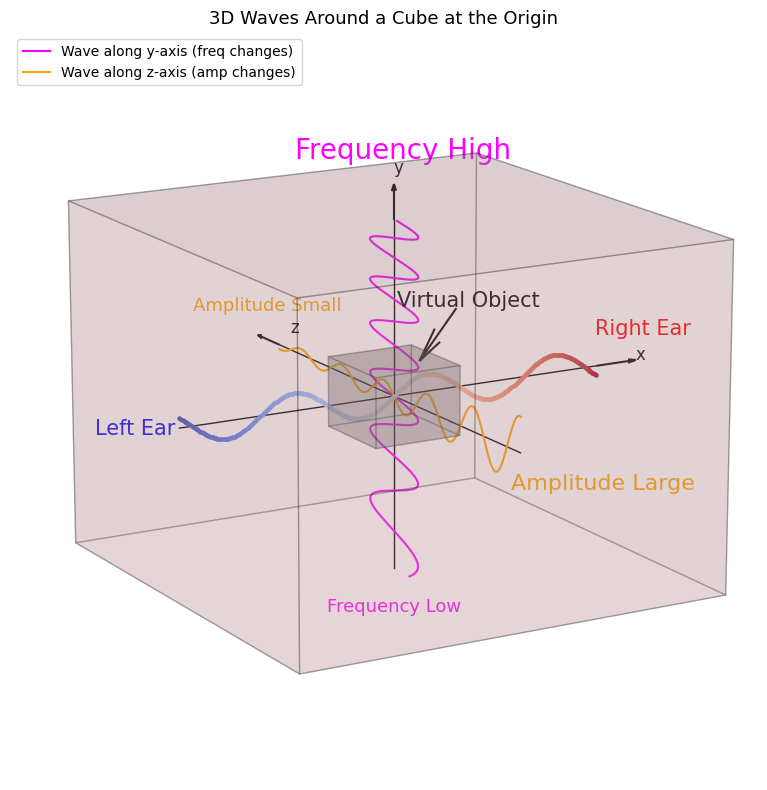

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(8,8),facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# -----------------------------
# 1) 軸(アロー付き)を中心(原点)に描画
# -----------------------------
limit = 5
ax.plot([-limit, limit],[0,0],[0,0], color='black', linewidth=1)
ax.plot([0,0],[-limit, limit],[0,0], color='black', linewidth=1)
ax.plot([0,0],[0,0],[-limit, limit], color='black', linewidth=1)

arrow_size = 1
ax.quiver(limit, 0, 0, arrow_size, 0, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, limit, 0, 0, arrow_size, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, 0, limit, 0, 0, arrow_size, color='black', arrow_length_ratio=0.2)

# 軸ラベル
ax.text(limit+1, 0, 0, 'x', color='black', fontsize=12)
ax.text(0, limit -0.5, 0.5, 'z', color='black', fontsize=12)
ax.text(0, 0, limit+1.3, 'y', color='black', fontsize=12)

# 各軸の説明テキスト(定位・振幅・周波数の概念)
ax.text(-limit-1, 0, 0, 'Left Ear', color='blue', fontsize=15, ha='center')
ax.text(limit+1.5, 0.5, 0.5, 'Right Ear', color='red', fontsize=15, ha='center')
ax.text(0, -limit-3, 0, 'Amplitude Large', color='orange', fontsize=16, ha='center')
ax.text(0.5, limit+1.5, 0.5, 'Amplitude Small', color='orange', fontsize=13, ha='center')
ax.text(0, 0, -limit-1.3, 'Frequency Low', color='magenta', fontsize=13, ha='center')
ax.text(0.5, 0.5, limit+1.5,  'Frequency High', color='magenta', fontsize=20, ha='center')

# -----------------------------
# ★ 原点付近に立方体を配置 (bar3d)
#    - 辺の長さ=1、中心=(0,0,0)  →  -0.5～+0.5に広がる
# -----------------------------
# ax.bar3d(
#     -0.5, -0.5, -0.5,  # 立方体の開始位置(x, y, z)
#     1, 1, 1,           # 立方体のサイズ(dx, dy, dz)
#     color='gray',
#     alpha=0.2,         # 半透明度
#     edgecolor='black'
# )
leng=1
ax.bar3d(
    -leng, -leng, -leng,  # 立方体の開始位置(x, y, z)
    leng*2, leng*2, leng*2,           # 立方体のサイズ(dx, dy, dz)
    color='gray',
    alpha=0.2,         # 半透明度
    edgecolor='black'
)


ax.bar3d(
    -limit, -limit, -limit,  # 立方体の開始位置(x, y, z)
    limit*2, limit*2, limit*2,           # 立方体のサイズ(dx, dy, dz)
    color='pink',
    alpha=0.2,         # 半透明度
    edgecolor='black'
)

ax.text(leng*3, leng+1, leng+0.5,  'Virtual Object', color='black', fontsize=15, ha='center')
ax.quiver(leng*2.7, leng+1, leng+0.5, -arrow_size*1.5, -arrow_size*1,-arrow_size*1, color='black', arrow_length_ratio=0.5)
# -----------------------------
# 2) x軸に沿う波 (定位＋振幅変化＋色のグラデーション)
# -----------------------------
t = np.linspace(-limit, limit, 400)

# 周波数は一定
freq_x = 2.0
# 振幅が x に応じて 0.5 → 0.5 (ここでは一定に設定されている例なので、必要に応じて変更)
amp_x_min, amp_x_max = 0.5, 0.5
amp_x = amp_x_min + (amp_x_max - amp_x_min)*((t + limit)/(2*limit))

x_wave = t
y_wave = np.zeros_like(t)
z_wave = amp_x * np.sin(freq_x * t)

# x<0は青, x>0は赤になるようにグラデーション (coolwarmなど)
norm = mcolors.Normalize(vmin=-limit, vmax=limit)
cmap = plt.cm.coolwarm

for i in range(len(t)):
    color = cmap(norm(x_wave[i]))
    ax.scatter(x_wave[i], y_wave[i], z_wave[i], color=color, s=5)

# -----------------------------
# 3) y軸に沿う波 (周波数変化)
# -----------------------------
ty = np.linspace(-limit, limit, 300)

# 周波数が y に応じて 3.0 → 5.0 に線形変化
freq_y_min, freq_y_max = 3.0, 5.0
freq_y = freq_y_min + (freq_y_max - freq_y_min)*((ty + limit)/(2*limit))

amp_y = 1.0
x_wave_y = np.zeros_like(ty)
y_wave_y = ty
z_wave_y = amp_y * np.sin(freq_y * ty)

# y軸の波を描画
ax.plot(x_wave_y, z_wave_y, y_wave_y, color='magenta', linewidth=1.5,
        label='Wave along y-axis (freq changes)')

# -----------------------------
# 4) z軸に沿う波 (指数的減衰)
# -----------------------------
tz = np.linspace(-limit, limit, 300)

# 振幅が指数的に減衰
amp_z = np.exp(-0.2 * np.abs(tz + limit))

freq_z = 3.5
x_wave_z = np.zeros_like(tz)
y_wave_z = amp_z * np.sin(freq_z * tz)
z_wave_z = tz

ax.plot(x_wave_z, z_wave_z, y_wave_z, color='orange', linewidth=1.5,
        label='Wave along z-axis (amp changes)')

# -----------------------------
# 5) 軸範囲・外観調整
# -----------------------------
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_facecolor('white')
fig.patch.set_facecolor('white')  # 全体背景も白
ax._axis3don = False
ax.legend(loc='upper left')
ax.view_init(elev=15, azim=-120)

plt.title('3D Waves Around a Cube at the Origin', fontsize=13)
plt.tight_layout()
plt.show()

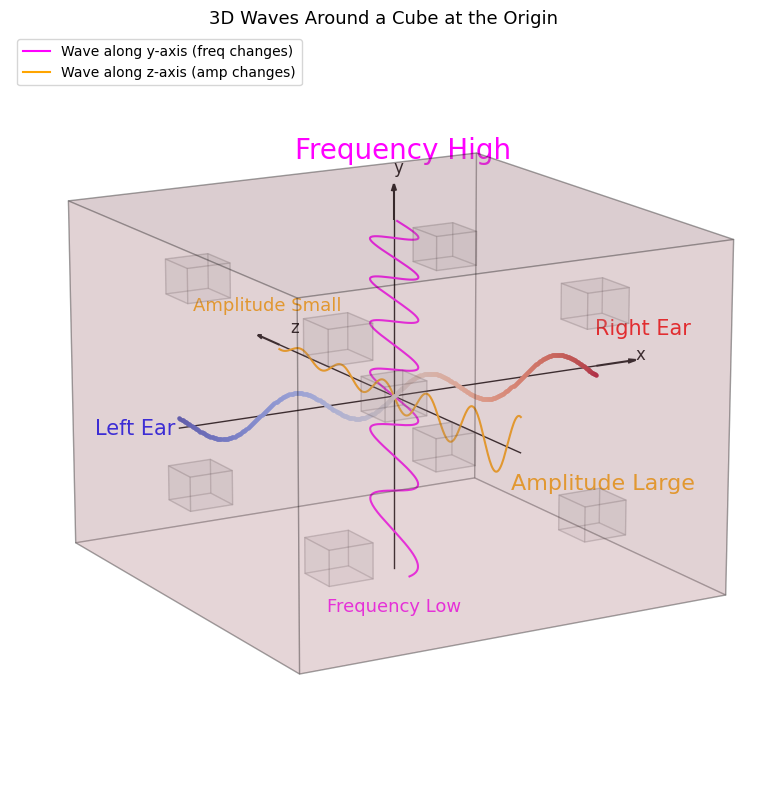

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(8,8),facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# -----------------------------
# 1) 軸(アロー付き)を中心(原点)に描画
# -----------------------------
limit = 5
ax.plot([-limit, limit],[0,0],[0,0], color='black', linewidth=1)
ax.plot([0,0],[-limit, limit],[0,0], color='black', linewidth=1)
ax.plot([0,0],[0,0],[-limit, limit], color='black', linewidth=1)

arrow_size = 1
ax.quiver(limit, 0, 0, arrow_size, 0, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, limit, 0, 0, arrow_size, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, 0, limit, 0, 0, arrow_size, color='black', arrow_length_ratio=0.2)

# 軸ラベル
ax.text(limit+1, 0, 0, 'x', color='black', fontsize=12)
ax.text(0, limit -0.5, 0.5, 'z', color='black', fontsize=12)
ax.text(0, 0, limit+1.3, 'y', color='black', fontsize=12)

# 各軸の説明テキスト(定位・振幅・周波数の概念)
ax.text(-limit-1, 0, 0, 'Left Ear', color='blue', fontsize=15, ha='center')
ax.text(limit+1.5, 0.5, 0.5, 'Right Ear', color='red', fontsize=15, ha='center')
ax.text(0, -limit-3, 0, 'Amplitude Large', color='orange', fontsize=16, ha='center')
ax.text(0.5, limit+1.5, 0.5, 'Amplitude Small', color='orange', fontsize=13, ha='center')
ax.text(0, 0, -limit-1.3, 'Frequency Low', color='magenta', fontsize=13, ha='center')
ax.text(0.5, 0.5, limit+1.5,  'Frequency High', color='magenta', fontsize=20, ha='center')

# -----------------------------
# ★ 原点付近に立方体を配置 (bar3d)
#    - 辺の長さ=1、中心=(0,0,0)  →  -0.5～+0.5に広がる
# -----------------------------
# ax.bar3d(
#     -0.5, -0.5, -0.5,  # 立方体の開始位置(x, y, z)
#     1, 1, 1,           # 立方体のサイズ(dx, dy, dz)
#     color='gray',
#     alpha=0.2,         # 半透明度
#     edgecolor='black'
# )
# leng=0.5
# for x in range(3):
#     for y in range(3):
#         for z in range(3):
#             ax.bar3d(
#                 -leng*(1-x)*6-leng, -leng*( 1- y)*6-leng, -leng*(1-z)*6,  # 立方体の開始位置(x, y, z)
#                 leng*2, leng*2, leng*2,           # 立方体のサイズ(dx, dy, dz)
#                 color='gray',
#                 alpha=0.1,         # 半透明度
#                 edgecolor='black'
#             )
leng=0.5
positions = [
    (-leng, -leng, -leng),
    (-leng - 6 * leng, -leng - 6 * leng, -leng - 6 * leng),
    (-leng - 6 * leng, -leng + 6 * leng, -leng - 6 * leng),
    (-leng - 6 * leng, -leng - 6 * leng, -leng + 6 * leng),
    (-leng - 6 * leng, -leng + 6 * leng, -leng + 6 * leng),
    (-leng + 6 * leng, -leng - 6 * leng, -leng - 6 * leng),
    (-leng + 6 * leng, -leng + 6 * leng, -leng - 6 * leng),
    (-leng + 6 * leng, -leng - 6 * leng, -leng + 6 * leng),
    (-leng + 6 * leng, -leng + 6 * leng, -leng + 6 * leng)
]

for pos in positions:
    ax.bar3d(
        pos[0], pos[1], pos[2],  # 立方体の開始位置(x, y, z)
        leng * 2, leng * 2, leng * 2,  # 立方体のサイズ(dx, dy, dz)
        color='white',
        alpha=0.1,  # 半透明度
        edgecolor='black'
    )
    

ax.bar3d(
    -limit, -limit, -limit,  # 立方体の開始位置(x, y, z)
    limit*2, limit*2, limit*2,           # 立方体のサイズ(dx, dy, dz)
    color='pink',
    alpha=0.2,         # 半透明度
    edgecolor='black'
)

# ax.text(leng*3, leng+1, leng+0.5,  'Virtual Object', color='black', fontsize=15, ha='center')
# ax.quiver(leng*2.7, leng+1, leng+0.5, -arrow_size*1.5, -arrow_size*1,-arrow_size*1, color='black', arrow_length_ratio=0.5)
# -----------------------------
# 2) x軸に沿う波 (定位＋振幅変化＋色のグラデーション)
# -----------------------------
t = np.linspace(-limit, limit, 400)

# 周波数は一定
freq_x = 2.0
# 振幅が x に応じて 0.5 → 0.5 (ここでは一定に設定されている例なので、必要に応じて変更)
amp_x_min, amp_x_max = 0.5, 0.5
amp_x = amp_x_min + (amp_x_max - amp_x_min)*((t + limit)/(2*limit))

x_wave = t
y_wave = np.zeros_like(t)
z_wave = amp_x * np.sin(freq_x * t)

# x<0は青, x>0は赤になるようにグラデーション (coolwarmなど)
norm = mcolors.Normalize(vmin=-limit, vmax=limit)
cmap = plt.cm.coolwarm

for i in range(len(t)):
    color = cmap(norm(x_wave[i]))
    ax.scatter(x_wave[i], y_wave[i], z_wave[i], color=color, s=5)

# -----------------------------
# 3) y軸に沿う波 (周波数変化)
# -----------------------------
ty = np.linspace(-limit, limit, 300)

# 周波数が y に応じて 3.0 → 5.0 に線形変化
freq_y_min, freq_y_max = 3.0, 5.0
freq_y = freq_y_min + (freq_y_max - freq_y_min)*((ty + limit)/(2*limit))

amp_y = 1.0
x_wave_y = np.zeros_like(ty)
y_wave_y = ty
z_wave_y = amp_y * np.sin(freq_y * ty)

# y軸の波を描画
ax.plot(x_wave_y, z_wave_y, y_wave_y, color='magenta', linewidth=1.5,
        label='Wave along y-axis (freq changes)')

# -----------------------------
# 4) z軸に沿う波 (指数的減衰)
# -----------------------------
tz = np.linspace(-limit, limit, 300)

# 振幅が指数的に減衰
amp_z = np.exp(-0.2 * np.abs(tz + limit))

freq_z = 3.5
x_wave_z = np.zeros_like(tz)
y_wave_z = amp_z * np.sin(freq_z * tz)
z_wave_z = tz

ax.plot(x_wave_z, z_wave_z, y_wave_z, color='orange', linewidth=1.5,
        label='Wave along z-axis (amp changes)')

# -----------------------------
# 5) 軸範囲・外観調整
# -----------------------------
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_facecolor('white')
fig.patch.set_facecolor('white')  # 全体背景も白
ax._axis3don = False
ax.legend(loc='upper left')
ax.view_init(elev=15, azim=-120)

plt.title('3D Waves Around a Cube at the Origin', fontsize=13)
plt.tight_layout()
plt.show()

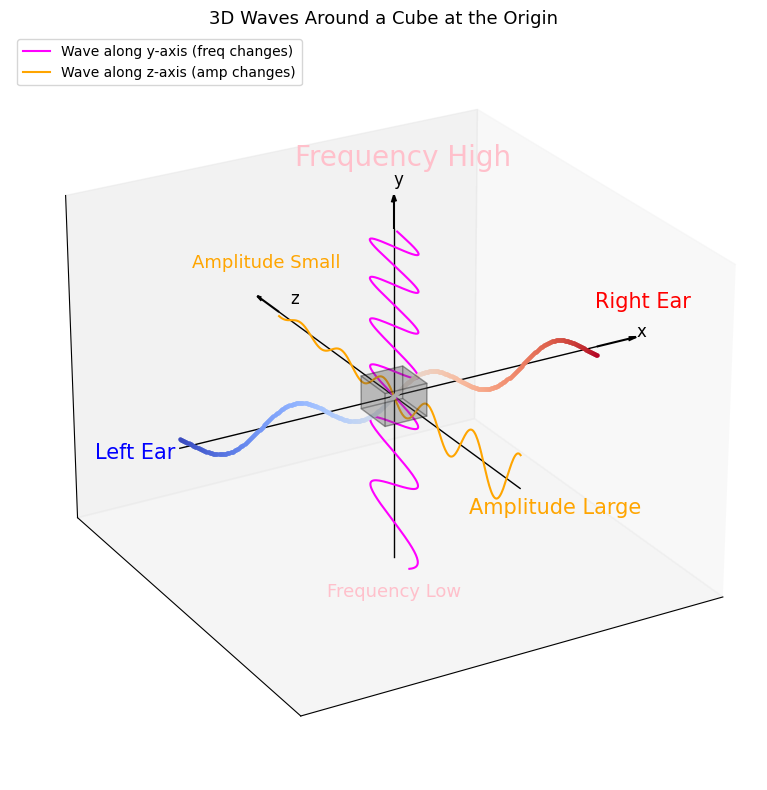

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# -----------------------------
# 1) 軸(アロー付き)を中心(原点)に描画
# -----------------------------
limit = 5
ax.plot([-limit, limit],[0,0],[0,0], color='black', linewidth=1)
ax.plot([0,0],[-limit, limit],[0,0], color='black', linewidth=1)
ax.plot([0,0],[0,0],[-limit, limit], color='black', linewidth=1)

arrow_size = 1
ax.quiver(limit, 0, 0, arrow_size, 0, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, limit, 0, 0, arrow_size, 0, color='black', arrow_length_ratio=0.2)
ax.quiver(0, 0, limit, 0, 0, arrow_size, color='black', arrow_length_ratio=0.2)

# 軸ラベル
ax.text(limit+1, 0, 0, 'x', color='black', fontsize=12)
ax.text(0, limit -0.5, 0.5, 'z', color='black', fontsize=12)
ax.text(0, 0, limit+1.3, 'y', color='black', fontsize=12)

# 各軸の説明テキスト(定位・振幅・周波数の概念)
ax.text(-limit-1, 0, 0, 'Left Ear', color='blue', fontsize=15, ha='center')
ax.text(limit+1.5, 0.5, 0.5, 'Right Ear', color='red', fontsize=15, ha='center')
ax.text(0, -limit-1.3, 0, 'Amplitude Large', color='orange', fontsize=15, ha='center')
ax.text(0.5, limit+1.5, 0.5, 'Amplitude Small', color='orange', fontsize=13, ha='center')
ax.text(0, 0, -limit-1.3, 'Frequency Low', color='pink', fontsize=13, ha='center')
ax.text(0.5, 0.5, limit+1.5,  'Frequency High', color='pink', fontsize=20, ha='center')

# -----------------------------
# ★ 原点付近に立方体を配置 (bar3d)
#    - 辺の長さ=1、中心=(0,0,0)  →  -0.5～+0.5に広がる
# -----------------------------
ax.bar3d(
    -0.5, -0.5, -0.5,  # 立方体の開始位置(x, y, z)
    1, 1, 1,           # 立方体のサイズ(dx, dy, dz)
    color='gray',
    alpha=0.2,         # 半透明度
    edgecolor='black'
)

# -----------------------------
# 2) x軸に沿う波 (定位＋振幅変化＋色のグラデーション)
# -----------------------------
t = np.linspace(-limit, limit, 400)

# 周波数は一定
freq_x = 2.0
# 振幅が x に応じて 0.5 → 0.5 (ここでは一定に設定されている例なので、必要に応じて変更)
amp_x_min, amp_x_max = 0.5, 0.5
amp_x = amp_x_min + (amp_x_max - amp_x_min)*((t + limit)/(2*limit))

x_wave = t
y_wave = np.zeros_like(t)
z_wave = amp_x * np.sin(freq_x * t)

# x<0は青, x>0は赤になるようにグラデーション (coolwarmなど)
norm = mcolors.Normalize(vmin=-limit, vmax=limit)
cmap = plt.cm.coolwarm

for i in range(len(t)):
    color = cmap(norm(x_wave[i]))
    ax.scatter(x_wave[i], y_wave[i], z_wave[i], color=color, s=5)

# -----------------------------
# 3) y軸に沿う波 (周波数変化)
# -----------------------------
ty = np.linspace(-limit, limit, 300)

# 周波数が y に応じて 3.0 → 5.0 に線形変化
freq_y_min, freq_y_max = 3.0, 5.0
freq_y = freq_y_min + (freq_y_max - freq_y_min)*((ty + limit)/(2*limit))

amp_y = 1.0
x_wave_y = np.zeros_like(ty)
y_wave_y = ty
z_wave_y = amp_y * np.sin(freq_y * ty)

# y軸の波を描画
ax.plot(x_wave_y, z_wave_y, y_wave_y, color='magenta', linewidth=1.5,
        label='Wave along y-axis (freq changes)')

# -----------------------------
# 4) z軸に沿う波 (指数的減衰)
# -----------------------------
tz = np.linspace(-limit, limit, 300)

# 振幅が指数的に減衰
amp_z = np.exp(-0.2 * np.abs(tz + limit))

freq_z = 3.5
x_wave_z = np.zeros_like(tz)
y_wave_z = amp_z * np.sin(freq_z * tz)
z_wave_z = tz

ax.plot(x_wave_z, z_wave_z, y_wave_z, color='orange', linewidth=1.5,
        label='Wave along z-axis (amp changes)')

# -----------------------------
# 5) 軸範囲・外観調整
# -----------------------------
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_facecolor('white')

ax.legend(loc='upper left')
ax.view_init(elev=25, azim=-120)

plt.title('3D Waves Around a Cube at the Origin', fontsize=13)
plt.tight_layout()
plt.show()